# ECE C247 - Neural Networks & Deep Learning, EEG Project
## Alexie Pogue, Amir Omidfar, Eric Peltola, Kenny Chen

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
from models import *
from solver import *
from utils import *

%matplotlib inline
%load_ext autoreload
%autoreload 2

# Parameters

In [0]:
LR      = 0.0005
BETAS   = (0.9, 0.999)
EPS     = 1e-08
DECAY   = 0.0005

BATCH_SIZE = 32
EPOCHS  = 100

# Data Setup

## Load Data

In [4]:
data_path = "/content/drive/Shared drives/ECE C247 Project/data/"

# load data files
X_train_valid, y_train_valid, X_test, y_test = load_data(data_path, subjects=[5], verbose=True)

Training/Valid data shape: (235, 22, 1000)
Test data shape: (47, 22, 1000)


## Preprocessing

In [0]:
# filter inputs
X_train_valid = filter_data(X_train_valid, fs=250, order=6, lowcut=7, highcut=30)
X_test = filter_data(X_test, fs=250, order=6, lowcut=7, highcut=30)

# smooth inputs
X_train_valid = smooth_data(X_train_valid, ws=5)
X_test = smooth_data(X_test, ws=5)

## PyTorch Dataloaders

In [0]:
# set up PyTorch dataloaders
data_loaders = dataloader_setup(X_train_valid, y_train_valid, X_test, y_test, batch_size=BATCH_SIZE)

# Model Comparison

## CNN

Training Progress: 	Epoch 1 [0/188 (0.00%)]		Loss: 1.41677
	Train loss: 0.04430, Accuracy: 47/188 (25.00%)
	Validation loss: 0.02984, Accuracy: 8/47 (17.02%)
	Test loss: 0.02942, Accuracy: 15/47 (31.91%)

Training Progress: 	Epoch 2 [0/188 (0.00%)]		Loss: 1.44392
	Train loss: 0.04425, Accuracy: 59/188 (31.38%)
	Validation loss: 0.03024, Accuracy: 9/47 (19.15%)
	Test loss: 0.02958, Accuracy: 11/47 (23.40%)

Training Progress: 	Epoch 3 [0/188 (0.00%)]		Loss: 1.45476
	Train loss: 0.04421, Accuracy: 53/188 (28.19%)
	Validation loss: 0.03022, Accuracy: 8/47 (17.02%)
	Test loss: 0.02971, Accuracy: 13/47 (27.66%)

Training Progress: 	Epoch 4 [0/188 (0.00%)]		Loss: 1.46034
	Train loss: 0.04400, Accuracy: 57/188 (30.32%)
	Validation loss: 0.03034, Accuracy: 10/47 (21.28%)
	Test loss: 0.02987, Accuracy: 11/47 (23.40%)

Training Progress: 	Epoch 5 [0/188 (0.00%)]		Loss: 1.47553
	Train loss: 0.04421, Accuracy: 59/188 (31.38%)
	Validation loss: 0.03101, Accuracy: 6/47 (12.77%)
	Test loss: 0.02986, 

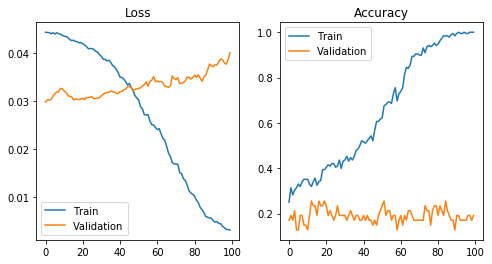

In [7]:
model = CNN().cuda()
optimizer = torch.optim.Adam(model.parameters(), lr=LR, betas=BETAS, eps=EPS, weight_decay=DECAY)
train_and_evaluate(model, optimizer, data_loaders, num_epochs=EPOCHS)

## LSTM

Training Progress: 	Epoch 1 [0/188 (0.00%)]		Loss: 1.37541
	Train loss: 0.04441, Accuracy: 47/188 (25.00%)
	Validation loss: 0.02965, Accuracy: 12/47 (25.53%)
	Test loss: 0.02993, Accuracy: 8/47 (17.02%)

Training Progress: 	Epoch 2 [0/188 (0.00%)]		Loss: 1.32180
	Train loss: 0.04438, Accuracy: 47/188 (25.00%)
	Validation loss: 0.02984, Accuracy: 12/47 (25.53%)
	Test loss: 0.02990, Accuracy: 8/47 (17.02%)

Training Progress: 	Epoch 3 [0/188 (0.00%)]		Loss: 1.20133
	Train loss: 0.04430, Accuracy: 49/188 (26.06%)
	Validation loss: 0.02995, Accuracy: 12/47 (25.53%)
	Test loss: 0.02999, Accuracy: 8/47 (17.02%)

Training Progress: 	Epoch 4 [0/188 (0.00%)]		Loss: 1.34530
	Train loss: 0.04400, Accuracy: 53/188 (28.19%)
	Validation loss: 0.03009, Accuracy: 9/47 (19.15%)
	Test loss: 0.03004, Accuracy: 8/47 (17.02%)

Training Progress: 	Epoch 5 [0/188 (0.00%)]		Loss: 1.23520
	Train loss: 0.04337, Accuracy: 59/188 (31.38%)
	Validation loss: 0.03025, Accuracy: 7/47 (14.89%)
	Test loss: 0.02995, Ac

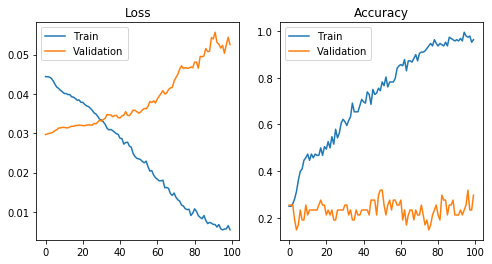

In [8]:
model = LSTM().cuda()
optimizer = torch.optim.Adam(model.parameters(), lr=LR, betas=BETAS, eps=EPS, weight_decay=DECAY)
train_and_evaluate(model, optimizer, data_loaders, num_epochs=EPOCHS)

## GRU

Training Progress: 	Epoch 1 [0/188 (0.00%)]		Loss: 1.51650
	Train loss: 0.04432, Accuracy: 45/188 (23.94%)
	Validation loss: 0.02911, Accuracy: 13/47 (27.66%)
	Test loss: 0.02979, Accuracy: 12/47 (25.53%)

Training Progress: 	Epoch 2 [0/188 (0.00%)]		Loss: 1.52164
	Train loss: 0.04422, Accuracy: 54/188 (28.72%)
	Validation loss: 0.02913, Accuracy: 13/47 (27.66%)
	Test loss: 0.02979, Accuracy: 9/47 (19.15%)

Training Progress: 	Epoch 3 [0/188 (0.00%)]		Loss: 1.47867
	Train loss: 0.04363, Accuracy: 65/188 (34.57%)
	Validation loss: 0.02935, Accuracy: 18/47 (38.30%)
	Test loss: 0.02947, Accuracy: 12/47 (25.53%)

Training Progress: 	Epoch 4 [0/188 (0.00%)]		Loss: 1.40860
	Train loss: 0.04263, Accuracy: 73/188 (38.83%)
	Validation loss: 0.02986, Accuracy: 15/47 (31.91%)
	Test loss: 0.02926, Accuracy: 10/47 (21.28%)

Training Progress: 	Epoch 5 [0/188 (0.00%)]		Loss: 1.32150
	Train loss: 0.04197, Accuracy: 79/188 (42.02%)
	Validation loss: 0.03000, Accuracy: 12/47 (25.53%)
	Test loss: 0.0291

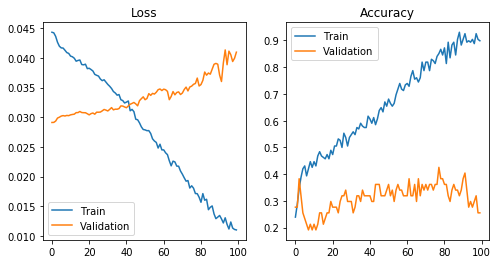

In [9]:
model = GRU().cuda()
optimizer = torch.optim.Adam(model.parameters(), lr=LR, betas=BETAS, eps=EPS, weight_decay=DECAY)
train_and_evaluate(model, optimizer, data_loaders, num_epochs=EPOCHS)

## CNN + LSTM

Training Progress: 	Epoch 1 [0/188 (0.00%)]		Loss: 1.37964
	Train loss: 0.04430, Accuracy: 46/188 (24.47%)
	Validation loss: 0.02966, Accuracy: 14/47 (29.79%)
	Test loss: 0.02953, Accuracy: 11/47 (23.40%)

Training Progress: 	Epoch 2 [0/188 (0.00%)]		Loss: 1.37806
	Train loss: 0.04428, Accuracy: 46/188 (24.47%)
	Validation loss: 0.02966, Accuracy: 14/47 (29.79%)
	Test loss: 0.02952, Accuracy: 11/47 (23.40%)

Training Progress: 	Epoch 3 [0/188 (0.00%)]		Loss: 1.37948
	Train loss: 0.04427, Accuracy: 46/188 (24.47%)
	Validation loss: 0.02966, Accuracy: 14/47 (29.79%)
	Test loss: 0.02950, Accuracy: 11/47 (23.40%)

Training Progress: 	Epoch 4 [0/188 (0.00%)]		Loss: 1.38067
	Train loss: 0.04426, Accuracy: 52/188 (27.66%)
	Validation loss: 0.02966, Accuracy: 15/47 (31.91%)
	Test loss: 0.02949, Accuracy: 11/47 (23.40%)

Training Progress: 	Epoch 5 [0/188 (0.00%)]		Loss: 1.38123
	Train loss: 0.04425, Accuracy: 50/188 (26.60%)
	Validation loss: 0.02966, Accuracy: 5/47 (10.64%)
	Test loss: 0.0294

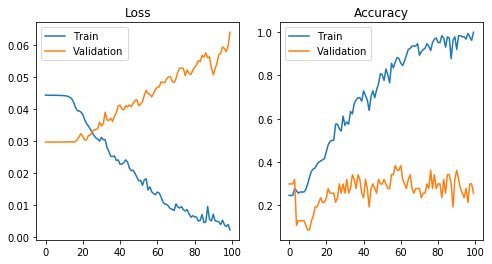

In [10]:
model = CNN_LSTM().cuda()
optimizer = torch.optim.Adam(model.parameters(), lr=LR, betas=BETAS, eps=EPS, weight_decay=DECAY)
train_and_evaluate(model, optimizer, data_loaders, num_epochs=EPOCHS)

## CNN + GRU

Training Progress: 	Epoch 1 [0/188 (0.00%)]		Loss: 1.38535
	Train loss: 0.04429, Accuracy: 46/188 (24.47%)
	Validation loss: 0.02967, Accuracy: 14/47 (29.79%)
	Test loss: 0.02942, Accuracy: 11/47 (23.40%)

Training Progress: 	Epoch 2 [0/188 (0.00%)]		Loss: 1.38250
	Train loss: 0.04425, Accuracy: 51/188 (27.13%)
	Validation loss: 0.02969, Accuracy: 8/47 (17.02%)
	Test loss: 0.02939, Accuracy: 17/47 (36.17%)

Training Progress: 	Epoch 3 [0/188 (0.00%)]		Loss: 1.38108
	Train loss: 0.04420, Accuracy: 49/188 (26.06%)
	Validation loss: 0.02973, Accuracy: 6/47 (12.77%)
	Test loss: 0.02936, Accuracy: 17/47 (36.17%)

Training Progress: 	Epoch 4 [0/188 (0.00%)]		Loss: 1.38131
	Train loss: 0.04416, Accuracy: 49/188 (26.06%)
	Validation loss: 0.02976, Accuracy: 6/47 (12.77%)
	Test loss: 0.02937, Accuracy: 17/47 (36.17%)

Training Progress: 	Epoch 5 [0/188 (0.00%)]		Loss: 1.38282
	Train loss: 0.04410, Accuracy: 50/188 (26.60%)
	Validation loss: 0.02973, Accuracy: 6/47 (12.77%)
	Test loss: 0.02939, 

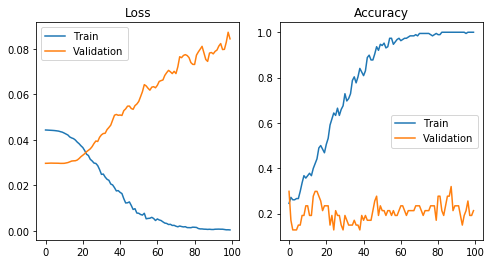

In [11]:
model = CNN_GRU().cuda()
optimizer = torch.optim.Adam(model.parameters(), lr=LR, betas=BETAS, eps=EPS, weight_decay=DECAY)
train_and_evaluate(model, optimizer, data_loaders, num_epochs=EPOCHS)